# 계층적 군집

## #01. 패키지

모델 : scipy.cluster.AgglomerativeClustering

거리계산 : scipy.cluster.hierarchy.linkage

시각화 : scipy.cluster.hierarchy.dendrogram

평가 : sklearn.metrics.silhouette_score , silhouette_samples, yellowbrick.cluster.KElbowVisualizer

In [1]:
import sys
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from pandas import read_excel, DataFrame

# sklearn은 AgglomerativeClustering() 함수를 제공
from sklearn.cluster import AgglomerativeClustering

# 표준화
from sklearn.preprocessing import MinMaxScaler

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

## #02. 데이터

In [6]:
origin = read_excel("행정동병합최종.xlsx")
origin.head()

,시도명,시군구코드,시군구명,행정동코드,행정동코드_수정,읍면동명,생성일자,말소일자,지하철역_수,의료기관_수,...,장애인_인구,세대당공원면적,보육시설수,세대당공원면적minmax,수변점수,행정동별버스정류장수,문화시민지수minmax,사회적약자지수minmax,접근성지수minmax,그린지수minmax
0,서울특별시,11110,종로구,1111051500,11110515,청운효자동,20081101,0,0,11,...,437,337.55,4,0.352898,0,32,0.066504,0.051957,0.223683,0.187151
1,서울특별시,11110,종로구,1111053000,11110530,사직동,19880423,0,2,75,...,267,60.79,0,0.063554,0,27,0.162371,0.033809,0.356139,0.033704
2,서울특별시,11110,종로구,1111054000,11110540,삼청동,19880423,0,0,11,...,110,956.51,3,1.000000,0,16,0.133941,0.063374,0.521907,0.530328
3,서울특별시,11110,종로구,1111055000,11110550,부암동,19880423,0,0,4,...,311,0.00,3,0.000000,10,34,0.042670,0.051612,0.277563,0.530328
4,서울특별시,11110,종로구,1111056000,11110560,평창동,19880423,0,0,15,...,491,1.14,3,0.001192,10,54,0.013283,0.057453,0.294623,0.530960


## #03. 데이터 전처리

### 필요한 데이터만 추출

In [7]:
origin.columns

Index(['시도명', '시군구코드', '시군구명', '행정동코드', '행정동코드_수정', '읍면동명', '생성일자', '말소일자',
       '지하철역_수', '의료기관_수', '사회복지시설_수', '계_명', '면적', '구성비', '행정동별_공원수',
       '공공체육시설_수', '문화시설_수', '학교_수', '사업체_수', '개소', '면수', '하천및한강여부', '아동인구',
       '노인인구', '장애인_인구', '세대당공원면적', '보육시설수', '세대당공원면적minmax', '수변점수',
       '행정동별버스정류장수', '문화시민지수minmax', '사회적약자지수minmax', '접근성지수minmax',
       '그린지수minmax'],
      dtype='object')

In [8]:
df = origin.filter(['문화시민지수minmax', '사회적약자지수minmax', '접근성지수minmax', '그린지수minmax'])
df.head()

,문화시민지수minmax,사회적약자지수minmax,접근성지수minmax,그린지수minmax
0,0.066504,0.051957,0.223683,0.187151
1,0.162371,0.033809,0.356139,0.033704
2,0.133941,0.063374,0.521907,0.530328
3,0.042670,0.051612,0.277563,0.530328
4,0.013283,0.057453,0.294623,0.530960


> 

In [9]:
df = df.fillna(0)
df.isna().sum()

문화시민지수minmax     0
사회적약자지수minmax    0
접근성지수minmax      0
그린지수minmax       0
dtype: int64

#### 분석에 사용될 지수 추출

`minmax로 scaling한 변수`

In [15]:
# X = df.filter(['문화시민지수minmax', '사회적약자지수minmax', '접근성지수minmax', '그린지수minmax'])
X = df.copy()
X.head()

,문화시민지수minmax,사회적약자지수minmax,접근성지수minmax,그린지수minmax
0,0.066504,0.051957,0.223683,0.187151
1,0.162371,0.033809,0.356139,0.033704
2,0.133941,0.063374,0.521907,0.530328
3,0.042670,0.051612,0.277563,0.530328
4,0.013283,0.057453,0.294623,0.530960


#### 지수의 결측치 확인 및 처리

In [11]:
# X.isna().sum()

In [12]:
# X = X.fillna(0)
# X.isna().sum()

#### 이상치(`int`) 유무 확인

In [17]:
# is_inf = X.isin([np.inf, -np.inf])

# # 각 column별로 -inf 또는 inf 값을 포함하고 있는 행 수를 확인
# inf_count = is_inf.sum()

# # 결과 출력
# inf_count

In [14]:
# X.columns

### 분석용 데이터 스케일링

In [18]:
scaler = MinMaxScaler()
n_data = scaler.fit_transform(X)
n_data[:5]

array([[0.06650434, 0.05195741, 0.22368253, 0.1871514 ],
       [0.1623708 , 0.03380891, 0.35613871, 0.03370444],
       [0.13394139, 0.06337387, 0.52190722, 0.5303279 ],
       [0.04267049, 0.05161193, 0.27756308, 0.5303279 ],
       [0.01328252, 0.05745262, 0.29462252, 0.53095996]])

In [19]:
ndf = DataFrame(n_data, columns=X.columns)
ndf.head()

,문화시민지수minmax,사회적약자지수minmax,접근성지수minmax,그린지수minmax
0,0.066504,0.051957,0.223683,0.187151
1,0.162371,0.033809,0.356139,0.033704
2,0.133941,0.063374,0.521907,0.530328
3,0.042670,0.051612,0.277563,0.530328
4,0.013283,0.057453,0.294623,0.530960


> 전원 수치 데이터임으로 별도의 라벨링이 필요 없다고 판단.

## #04. 계층 군집 수행

### 1. scipy 패키지 사용

scipy는 모델 생성/시각화 과정이 반자동이지만 sklearn은 수동으로 설정(공식으로 판단할 것)

linkage : 거리 측정 방법 지정<br/>
기본 값 : `ward`<br/>
그 외 값 : ‘ward’, ‘complete’, ‘average’, ‘single’

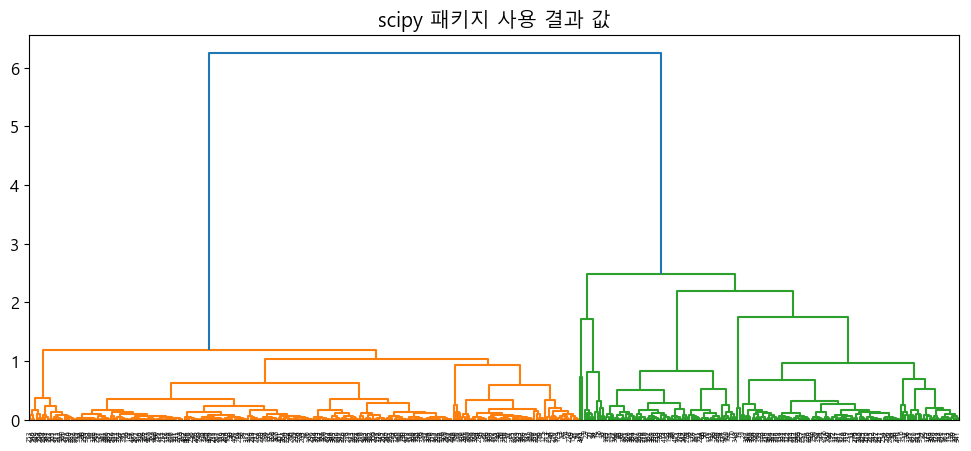

In [21]:
lnk = linkage(ndf, method="ward")
plt.figure(figsize=(12,5))
dendrogram(lnk, show_leaf_counts=True)
plt.title("scipy 패키지 사용 결과 값")
plt.show()
plt.close()

### 2. sklearn 패키지 사용

n_clusters : 찾아야 할 클러스터 수(earlystopping과 유사)

affinity : 클러스터 간 거리 측정 방법(euclidean, cityblock, manhattan, cosine)

linkage : ward(기본값), complete, average, single

compute_distances : 노드간의 거리 계산값을 저장할지 여부(시각화를 위해서는 True를 필수 적용)

`n_clusters`은 K-Means에서 엘보우 그래프로 확인된 `4`를 사용.

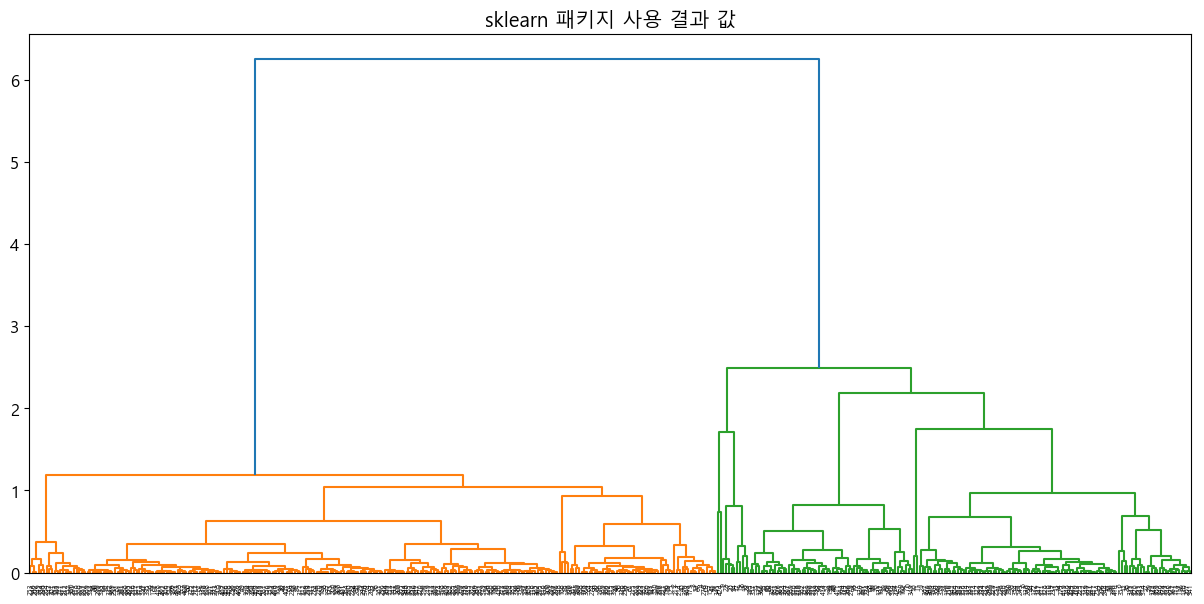

In [28]:
# 모델 객체 생성
ac = AgglomerativeClustering(n_clusters=4,  # 찾아야 할 클러스터 수(earlystopping과 유사)
                             metric='euclidean',  # 클러스터 간 거리 측정 방법
                             linkage='ward',    # 거리측정 방법
                             compute_distances=True #시각화를 위하 반드시 필요
                             )
# clustering = ac.fit(n_data) #학습

clustering = ac.fit(ndf) #학습
# print(clustering.labels_)   #학습결과 확인

# scipy는 아래의 과정을 자동으로 수행, sklearn은 수동으로 설정(공식으로 판단할 것)
counts = np.zeros(clustering.children_.shape[0])    #zeros 모든 원소가 0인 요소
n_samples = len(clustering.labels_)

# 자식 노드를 반복하면서 점을 찍어준다(자식이 몇개 있는지 확인하는 과정)
for i, merge in enumerate(clustering.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# 자식 노드의 수를 저장하는 배열
linkage_matrix = np.column_stack(
    [clustering.children_, clustering.distances_, counts]
).astype(float)

# plt를 설정하지 않으면 쓸데 없는 값도 함께 추출됨
# dendrogram(linkage_matrix)

plt.figure(figsize=(15,7))
dendrogram(linkage_matrix)
plt.title("sklearn 패키지 사용 결과 값")
plt.show()
plt.close()

### sklearn, scipy의 차이를 설명

### 군집수를 4로 설정한 분류 결과값

In [23]:
clustering.labels_

array([3, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 3, 1, 2, 2, 2, 2, 0,
       2, 2, 3, 0, 0, 0, 3, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 3, 1, 1, 1, 0,
       0, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 3, 1, 3, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 3, 0, 0, 1, 0, 1, 3, 3, 1, 1, 0, 3,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 0, 1, 1, 0, 1, 0, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 3, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,

### 분류 결과를 DataFrame과 결합

> 군집(label)을 포함한 DF 생성. <br/> labels를 hue로 잡고 진행하면 군집의 분류 결과를 알 수 있기 때문.

In [24]:
df['계층군집_결과'] = clustering.labels_
df.head()

,문화시민지수minmax,사회적약자지수minmax,접근성지수minmax,그린지수minmax,계층군집_결과
0,0.066504,0.051957,0.223683,0.187151,3
1,0.162371,0.033809,0.356139,0.033704,0
2,0.133941,0.063374,0.521907,0.530328,1
3,0.042670,0.051612,0.277563,0.530328,1
4,0.013283,0.057453,0.294623,0.530960,1


In [25]:
X.columns

Index(['문화시민지수minmax', '사회적약자지수minmax', '접근성지수minmax', '그린지수minmax'], dtype='object')

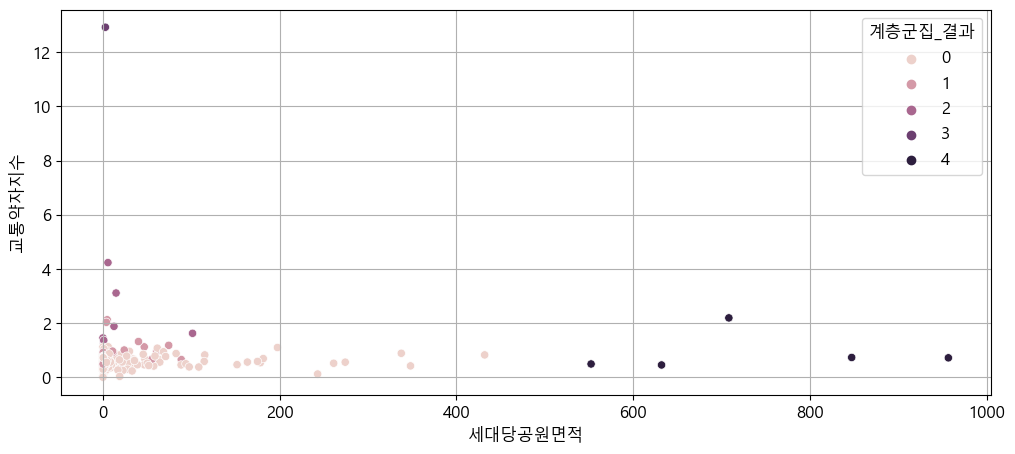

In [39]:
plt.figure(figsize=(12,5))
# #sb.scatterplot(x=n_data[, 0], y=n_data[, 1])
sb.scatterplot(data=df, x='세대당공원면적', y='교통약자지수', hue='계층군집_결과')
plt.grid()
plt.show()
plt.close()